In [2]:
import pandas as pd

# 데이터 로드
file_path = './data/쇼핑몰이탈.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객 ID    5630 non-null   int64  
 1   이탈 여부    5630 non-null   int64  
 2   가입 기간    5366 non-null   float64
 3   접속 기기    5630 non-null   object 
 4   도시 등급    5630 non-null   int64  
 5   배송거리     5379 non-null   float64
 6   결제 방식    5630 non-null   object 
 7   성별       5630 non-null   object 
 8   앱 사용 시간  5375 non-null   float64
 9   기기 수     5630 non-null   int64  
 10  주문 카테고리  5630 non-null   object 
 11  만족도      5630 non-null   int64  
 12  결혼 여부    5630 non-null   object 
 13  주소 수     5630 non-null   int64  
 14  불만족 여부   5630 non-null   int64  
 15  주문 증가율   5365 non-null   float64
 16  쿠폰 수     5374 non-null   float64
 17  주문 횟수    5372 non-null   float64
 18  경과일      5323 non-null   float64
 19  캐시백 금액   5630 non-null   int64  
dtypes: float64(7), int64(8), object(5)
memory u

In [3]:
df = data
df

,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [5]:
import pandas as pd

# 데이터 로드
file_path = './data/쇼핑몰이탈.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)

df = data
df



from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# 1. 행 삭제 (배송거리 결측치가 있는 행 제거)
df = df.dropna(subset=['배송거리'])
print("배송거리 결측치 제거 후 데이터 크기:", df.shape)

# 2. 중앙값 대체 (주문 증가율)
df['주문 증가율'].fillna(df['주문 증가율'].median(), inplace=True)
print("중앙값 대체 완료 (주문 증가율)")

# 3. 정규화 (KNN 기법 적용을 위한 모든 변수 한 번에 처리)
columns_to_normalize = [
    '가입 기간', '경과일', '주문 횟수', '쿠폰 수', '앱 사용 시간',
    '캐시백 금액', '기기 수'
]
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print("정규화 완료:", columns_to_normalize)

# 4. KNN Imputer 생성 및 적용 (각 컬럼별 상관계수 기반)
# 가입 기간
columns_for_가입기간 = ['가입 기간', '캐시백 금액']  # 상관계수 기반 선정
knn_imputer_가입기간 = KNNImputer(n_neighbors=10)
df[columns_for_가입기간] = knn_imputer_가입기간.fit_transform(df[columns_for_가입기간])

# 경과일
columns_for_경과일 = ['경과일', '주문 횟수', '쿠폰 수', '캐시백 금액']  # 상관계수 기반 선정
knn_imputer_경과일 = KNNImputer(n_neighbors=10)
df[columns_for_경과일] = knn_imputer_경과일.fit_transform(df[columns_for_경과일])

# 주문 횟수
columns_for_주문횟수 = ['주문 횟수', '쿠폰 수', '경과일', '캐시백 금액']  # 상관계수 기반 선정
knn_imputer_주문횟수 = KNNImputer(n_neighbors=10)
df[columns_for_주문횟수] = knn_imputer_주문횟수.fit_transform(df[columns_for_주문횟수])

# 쿠폰 수
columns_for_쿠폰수 = ['쿠폰 수', '주문 횟수', '경과일']  # 상관계수 기반 선정
knn_imputer_쿠폰수 = KNNImputer(n_neighbors=10)
df[columns_for_쿠폰수] = knn_imputer_쿠폰수.fit_transform(df[columns_for_쿠폰수])

# 앱 사용 시간
columns_for_앱사용시간 = ['앱 사용 시간', '기기 수']  # 상관계수 기반 선정
knn_imputer_앱사용시간 = KNNImputer(n_neighbors=10)
df[columns_for_앱사용시간] = knn_imputer_앱사용시간.fit_transform(df[columns_for_앱사용시간])

# 5. 최종 결측치 확인
print("최종 결측치 확인:\n", df.isnull().sum())

# 6. 처리 후 데이터 저장 (선택 사항) - 한글 인코딩 처리
df.to_csv('쇼핑몰이탈_03.csv', index=True, encoding='utf-8-sig')
print("결과 저장 완료: processed_dataframe.csv (UTF-8 with BOM 인코딩 적용)")


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객 ID    5630 non-null   int64  
 1   이탈 여부    5630 non-null   int64  
 2   가입 기간    5366 non-null   float64
 3   접속 기기    5630 non-null   object 
 4   도시 등급    5630 non-null   int64  
 5   배송거리     5379 non-null   float64
 6   결제 방식    5630 non-null   object 
 7   성별       5630 non-null   object 
 8   앱 사용 시간  5375 non-null   float64
 9   기기 수     5630 non-null   int64  
 10  주문 카테고리  5630 non-null   object 
 11  만족도      5630 non-null   int64  
 12  결혼 여부    5630 non-null   object 
 13  주소 수     5630 non-null   int64  
 14  불만족 여부   5630 non-null   int64  
 15  주문 증가율   5365 non-null   float64
 16  쿠폰 수     5374 non-null   float64
 17  주문 횟수    5372 non-null   float64
 18  경과일      5323 non-null   float64
 19  캐시백 금액   5630 non-null   int64  
dtypes: float64(7), int64(8), object(5)
memory u

C:\Users\Admin\AppData\Local\Temp\ipykernel_25192\6552355.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주문 증가율'].fillna(df['주문 증가율'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25192\6552355.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25192\6552355.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

최종 결측치 확인:
 고객 ID      0
이탈 여부      0
가입 기간      0
접속 기기      0
도시 등급      0
배송거리       0
결제 방식      0
성별         0
앱 사용 시간    0
기기 수       0
주문 카테고리    0
만족도        0
결혼 여부      0
주소 수       0
불만족 여부     0
주문 증가율     0
쿠폰 수       0
주문 횟수      0
경과일        0
캐시백 금액     0
dtype: int64
결과 저장 완료: processed_dataframe.csv (UTF-8 with BOM 인코딩 적용)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25192\6552355.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_for_앱사용시간] = knn_imputer_앱사용시간.fit_transform(df[columns_for_앱사용시간])


In [9]:
import pandas as pd

# 정규화된 데이터 불러오기
file_path = './data/쇼핑몰이탈_03.csv'
df = pd.read_csv(file_path)

# 복원할 컬럼들과 정규화에 사용된 최소값과 최대값
scaling_info = {
    '가입 기간': {'min': 0.0, 'max': 61.0},
    '경과일': {'min': 0.0, 'max': 46.0},
    '주문 횟수': {'min': 1.0, 'max': 16.0},
    '쿠폰 수': {'min': 0.0, 'max': 16.0},
    '앱 사용 시간': {'min': 0.0, 'max': 5.0},
    '캐시백 금액': {'min': 0, 'max': 325},
    '기기 수': {'min': 1, 'max': 6}
}

# 정규화를 되돌리는 함수
def inverse_normalization(column, min_val, max_val):
    return column * (max_val - min_val) + min_val

# 각 컬럼 복원
for column, params in scaling_info.items():
    df[column] = inverse_normalization(df[column], params['min'], params['max'])

# 결과 확인
print(df.head())

# 복원된 데이터 저장
output_path = '쇼핑몰이탈_복원.csv'
df.to_csv('쇼핑몰이탈_복원2.csv', index=True, encoding='utf-8-sig')


   Unnamed: 0  고객 ID  이탈 여부  가입 기간         접속 기기  도시 등급  배송거리       결제 방식  \
0           0  50001      1    4.0  Mobile Phone      3   6.0  Debit Card   
1           1  50002      1    3.0         Phone      1   8.0         UPI   
2           2  50003      1    3.0         Phone      1  30.0  Debit Card   
3           3  50004      1    0.0         Phone      3  15.0  Debit Card   
4           4  50005      1    0.0         Phone      1  12.0          CC   

       성별  앱 사용 시간  ...             주문 카테고리 만족도   결혼 여부 주소 수  불만족 여부  주문 증가율  \
0  Female      3.0  ...  Laptop & Accessory   2  Single    9       1    11.0   
1    Male      3.0  ...              Mobile   3  Single    7       1    15.0   
2    Male      2.0  ...              Mobile   3  Single    6       1    14.0   
3    Male      2.0  ...  Laptop & Accessory   5  Single    8       0    23.0   
4    Male      2.2  ...              Mobile   5  Single    3       0    11.0   

   쿠폰 수  주문 횟수  경과일  캐시백 금액  
0   1.0    1.0  5.0   160.

In [11]:
# 복원된 데이터 읽기
df3 = pd.read_csv('./data/쇼핑몰이탈_복원2.csv')


In [19]:
df3

,Unnamed: 0,Unnamed: 0.1,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,...,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160.0
1,1,1,50002,1,3.0,Phone,1,8.0,UPI,Male,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121.0
2,2,2,50003,1,3.0,Phone,1,30.0,Debit Card,Male,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.0
3,3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.0
4,4,4,50005,1,0.0,Phone,1,12.0,CC,Male,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5374,5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,...,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151.0
5375,5375,5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,...,Fashion,5,Married,6,0,16.0,1.0,2.0,5.1,225.0
5376,5376,5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,...,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.0
5377,5377,5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,...,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179.0


In [13]:
# Unnamed: 0과 Unnamed: 0.1 열 삭제
df3 = df3.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [14]:
df3

,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160.0
1,50002,1,3.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121.0
2,50003,1,3.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.0
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.2,3.0,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151.0
5375,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5.0,Fashion,5,Married,6,0,16.0,1.0,2.0,5.1,225.0
5376,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2.0,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.0
5377,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5.0,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179.0


In [15]:
# 숫자형 컬럼에 대해 반올림 처리
numeric_columns = df3.select_dtypes(include=['float64']).columns
df3[numeric_columns] = df3[numeric_columns].round()

# 결과 확인
df3


,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160.0
1,50002,1,3.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121.0
2,50003,1,3.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.0
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.0,3.0,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151.0
5375,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5.0,Fashion,5,Married,6,0,16.0,1.0,2.0,5.0,225.0
5376,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2.0,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.0
5377,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5.0,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179.0


In [16]:
# 데이터프레임을 CSV 파일로 저장 (UTF-8 with BOM 인코딩 사용)
df3.to_csv('쇼핑몰이탈정제.csv', index=False, encoding='utf-8-sig')

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객 ID    5379 non-null   int64  
 1   이탈 여부    5379 non-null   int64  
 2   가입 기간    5379 non-null   float64
 3   접속 기기    5379 non-null   object 
 4   도시 등급    5379 non-null   int64  
 5   배송거리     5379 non-null   float64
 6   결제 방식    5379 non-null   object 
 7   성별       5379 non-null   object 
 8   앱 사용 시간  5379 non-null   float64
 9   기기 수     5379 non-null   float64
 10  주문 카테고리  5379 non-null   object 
 11  만족도      5379 non-null   int64  
 12  결혼 여부    5379 non-null   object 
 13  주소 수     5379 non-null   int64  
 14  불만족 여부   5379 non-null   int64  
 15  주문 증가율   5379 non-null   float64
 16  쿠폰 수     5379 non-null   float64
 17  주문 횟수    5379 non-null   float64
 18  경과일      5379 non-null   float64
 19  캐시백 금액   5379 non-null   float64
dtypes: float64(9), int64(6), object(5)
memory usage: 840

이상치가 발견된 변수: ['가입 기간', '배송거리', '앱 사용 시간', '주문 증가율', '캐시백 금액']


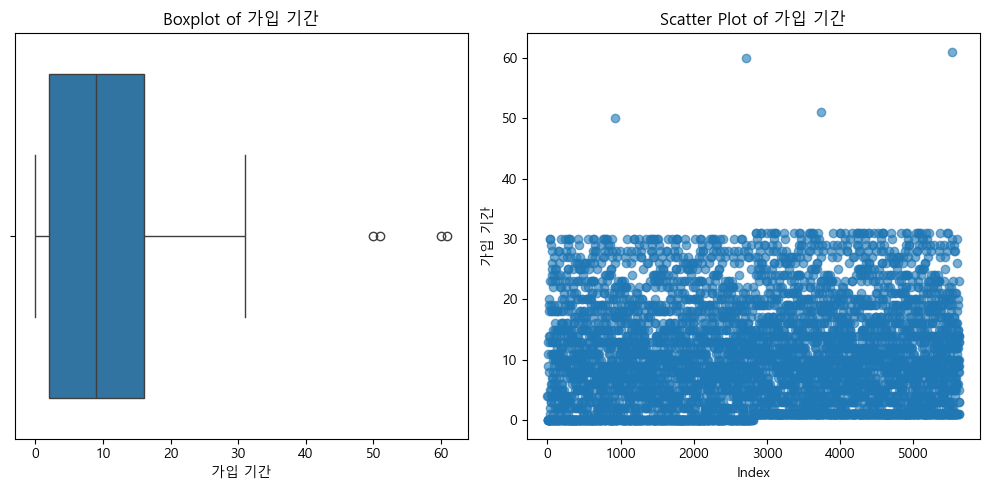

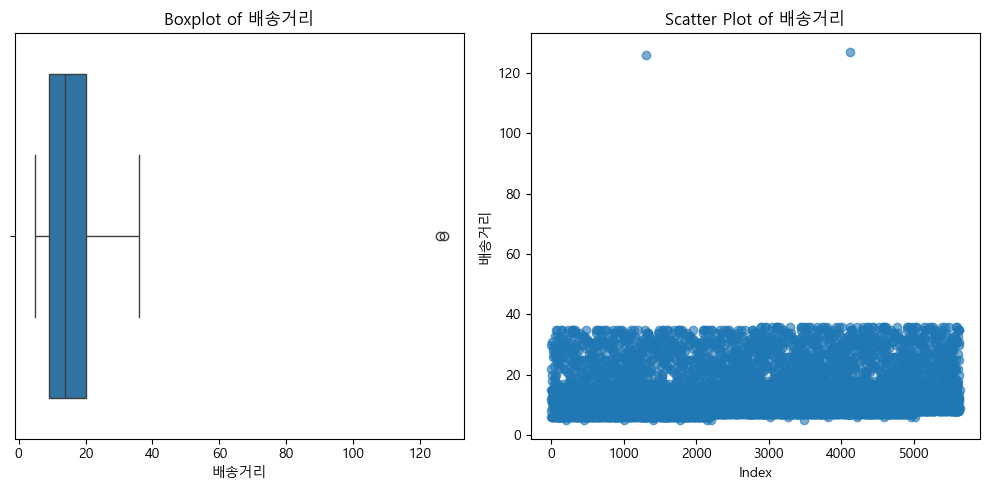

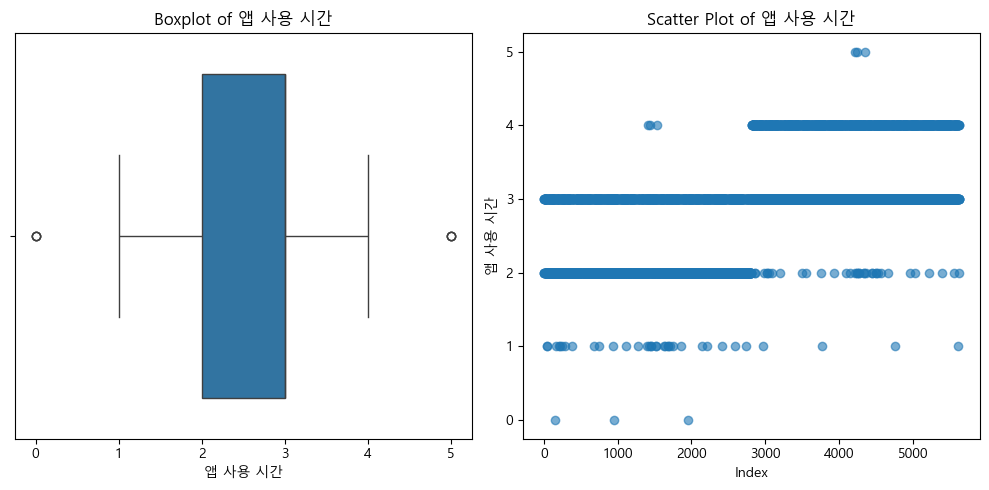

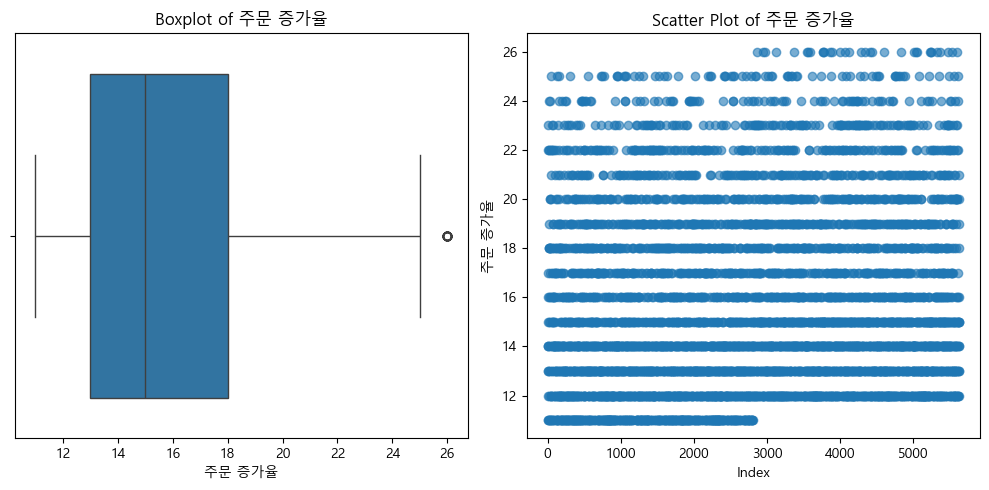

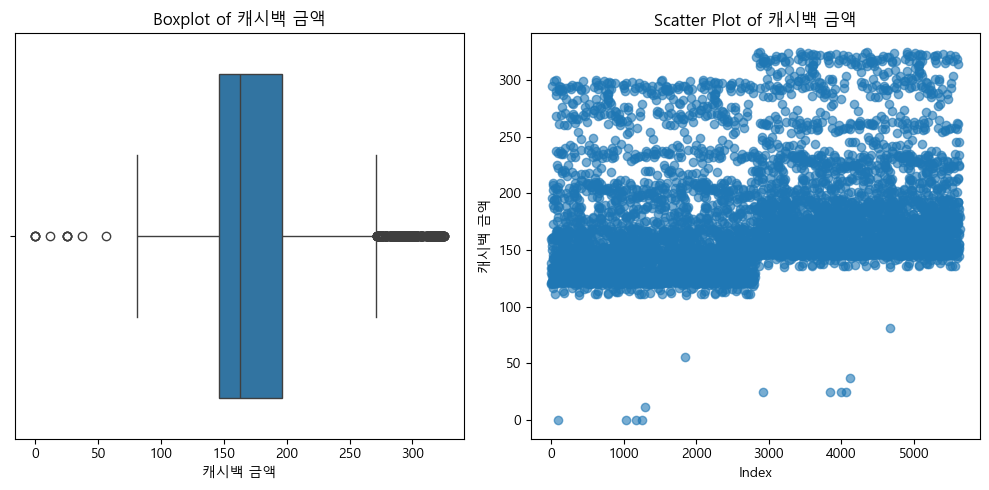

캐시백 금액 이상치 개수: 447
캐시백 금액 이상치 비율: 7.94%


{'가입 기간':       고객 ID  이탈 여부  가입 기간         접속 기기  도시 등급  배송거리       결제 방식      성별  \
 928   50929      0   50.0         Phone      1   6.0  Debit Card    Male   
 2719  52720      0   60.0  Mobile Phone      3  27.0  Debit Card  Female   
 3743  53744      0   51.0  Mobile Phone      1   7.0  Debit Card    Male   
 5534  55535      0   61.0  Mobile Phone      3  28.0  Debit Card  Female   
 
       앱 사용 시간  기기 수             주문 카테고리  만족도     결혼 여부  주소 수  불만족 여부  주문 증가율  \
 928       3.0     1  Laptop & Accessory    3  Divorced     1       0    24.0   
 2719      3.0     3             Grocery    1   Married     5       1    13.0   
 3743      4.0     2  Laptop & Accessory    3  Divorced     2       0    25.0   
 5534      4.0     4             Grocery    1   Married     6       1     NaN   
 
       쿠폰 수  주문 횟수  경과일  캐시백 금액  
 928    1.0    2.0  8.0     149  
 2719   NaN    1.0  0.0     279  
 3743   2.0    3.0  9.0     174  
 5534   1.0    2.0  1.0     304  ,
 '배송거리':       고객 ID  이탈 여

In [24]:
# IQR 방식으로 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 이상치 탐지 대상 변수들
columns_to_check = ['가입 기간', '배송거리', '앱 사용 시간', '주문 증가율', '캐시백 금액']

# 각 변수별 이상치 탐지 결과 저장
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers_iqr(data, column)

# 이상치가 있는 변수 확인
variables_with_outliers = [column for column, outliers in outliers_dict.items() if not outliers.empty]

# 이상치가 있는 변수 출력
print("이상치가 발견된 변수:", variables_with_outliers)

# 박스플롯 및 산점도 시각화
def visualize_outliers(df, columns):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for column in columns:
        plt.figure(figsize=(10, 5))

        # 박스플롯
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}")

        # 산점도
        plt.subplot(1, 2, 2)
        plt.scatter(range(len(df[column])), df[column], alpha=0.6)
        plt.title(f"Scatter Plot of {column}")
        plt.xlabel("Index")
        plt.ylabel(column)

        plt.tight_layout()
        plt.show()

# 시각화 실행
visualize_outliers(data, variables_with_outliers)

# 캐시백 금액 이상치 개수 계산
Q1 = data['캐시백 금액'].quantile(0.25)
Q3 = data['캐시백 금액'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cashback_outliers = data[(data['캐시백 금액'] < lower_bound) | (data['캐시백 금액'] > upper_bound)]

# 캐시백 금액 이상치 비율 계산
outlier_count = len(cashback_outliers)
total_count = len(data)
outlier_ratio = (outlier_count / total_count) * 100

print(f"캐시백 금액 이상치 개수: {outlier_count}")
print(f"캐시백 금액 이상치 비율: {outlier_ratio:.2f}%")

# 이상치 결과 확인
outliers_dict

In [26]:
# IQR 방식으로 이상치 탐지 및 처리
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# 이상치 삭제 대상 변수들
columns_to_remove_outliers = ['가입 기간', '배송거리', '앱 사용 시간', '주문 증가율']

# 데이터 복사본 생성
processed_data = data.copy()

# 이상치 삭제 처리
for column in columns_to_remove_outliers:
    lower_bound, upper_bound = detect_outliers_iqr(processed_data, column)
    processed_data = processed_data[(processed_data[column] >= lower_bound) & (processed_data[column] <= upper_bound)]

# 캐시백 금액 이상치 클리핑 처리
cashback_column = '캐시백 금액'
lower_bound, upper_bound = detect_outliers_iqr(processed_data, cashback_column)
processed_data[cashback_column] = processed_data[cashback_column].clip(lower=lower_bound, upper=upper_bound)

# 결과 확인
print(f"이상치 삭제 및 클리핑 처리 완료")
print(processed_data.describe())

# 처리된 데이터를 CSV 파일로 저장
processed_data.to_csv('쇼핑몰이탈_이상치처리.csv', index=False, encoding='utf-8-sig')
print("처리된 데이터가 '쇼핑몰이탈_이상치처리.csv' 파일로 저장되었습니다.")

이상치 삭제 및 클리핑 처리 완료
              고객 ID        이탈 여부        가입 기간        도시 등급         배송거리  \
count   4551.000000  4551.000000  4551.000000  4551.000000  4551.000000   
mean   53009.790595     0.155790    10.017359     1.709075    15.803340   
std     1611.695451     0.362696     8.258803     0.937241     8.331866   
min    50001.000000     0.000000     0.000000     1.000000     5.000000   
25%    51648.500000     0.000000     3.000000     1.000000     9.000000   
50%    53151.000000     0.000000     9.000000     1.000000    14.000000   
75%    54389.500000     0.000000    15.000000     3.000000    21.000000   
max    55630.000000     1.000000    31.000000     3.000000    36.000000   

           앱 사용 시간         기기 수          만족도         주소 수       불만족 여부  \
count  4551.000000  4551.000000  4551.000000  4551.000000  4551.000000   
mean      2.974291     3.759613     3.061525     4.350472     0.285652   
std       0.720499     1.027214     1.383956     2.589667     0.451774   
min      